In [0]:
#importing modules
import pandas as pd
import random 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as mat
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson
import numpy as np

In [155]:
#read csv
data_org=pd.read_csv("/content/drive/My Drive/projectDeng/trains.csv")
datal_org=pd.read_csv("/content/drive/My Drive/projectDeng/label.csv")
datat=data_org.copy()
datal=datal_org.copy()
datat.insert(23,"total_cases",datal.total_cases,True)
datat

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,4,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,5,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,4,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,6,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,5,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,8,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,1,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,1,16.0


In [156]:
#splitting data based on the city
data_sj=datat[datat['city']=='sj']
data_sj['week_start_date']=pd.to_datetime(data_sj['week_start_date'])
data_sj.set_index(['week_start_date'],inplace=True)
data_iq=datat[datat['city']=='iq']
data_iq['week_start_date']=pd.to_datetime(data_iq['week_start_date'])
data_iq.set_index(['week_start_date'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
data_sj['ndvi_nw'].isnull().values

In [162]:
#Remove null values from the dataset by adding mean of adjecent terms as the missing element
def removenull(dataq):
  for col in dataq:
    if(col!="city" and col!="week_start_date"):
      num_of_rows=dataq['city'].count()
      for i in range(0,num_of_rows-2):
        if(pd.isna(dataq.iloc[i][col])):
          f_found=i
          first=i-1
          second=i-2
          countna=0
          for j in range(f_found,num_of_rows):
            countna=countna+1
            
            if(not pd.isna(dataq.iloc[j][col])):
              l_found=j+1
              l_found2=j+2
              break
          l_found=j+1
          l_found2=j+2
          #try:
          dataq[col][f_found:l_found].fillna((dataq.iloc[first][col]+dataq.iloc[second][col]+dataq.iloc[l_found2][col]+dataq.iloc[l_found][col])/4,inplace=True)
          #except:
          print(dataq[col][f_found])
          
  return dataq

data_sj=removenull(data_sj)
data_iq=removenull(data_iq)
data_sj[data_sj['ndvi_nw'].isnull().values]

nan
nan
nan
nan
nan
nan
nan
nan
nan
0.10647265624999999
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.03261354171875
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-0.03911251046875
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
28.01510416666875
nan
nan
27.09375
nan
nan
nan
9.94729166666875
nan
nan
11.409375
nan
nan
nan
34.2375
22.5375


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,
1991-07-09,sj,1991,28,0.0969,NaN,0.138050,0.167917,6.13,300.001429,300.171429,295.791429,302.1,297.9,18.70,77.877143,6.13,17.151429,2.428571,28.414286,6.671429,32.8,24.4,14,4.6
1991-07-30,sj,1991,31,NaN,NaN,0.190643,0.159329,48.41,299.852857,299.964286,296.478571,302.0,298.3,34.39,81.897143,48.41,17.878571,2.300000,28.571429,6.342857,33.3,25.0,25,18.0
1991-08-13,sj,1991,33,0.0593,NaN,0.155100,0.156700,0.00,300.420000,300.650000,296.484286,302.8,298.7,20.40,79.197143,0.00,17.911429,2.185714,29.428571,5.471429,33.3,25.6,60,3.3
2008-04-15,sj,2008,16,0.0018,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,3,11.2


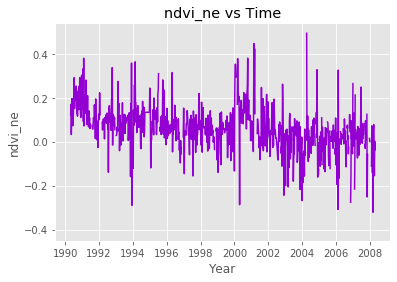


 ndvi_ne is the Pixel northeast of city centroid




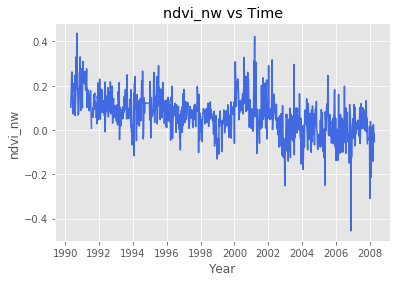


 ndvi_nw is the Pixel northwest of city centroid




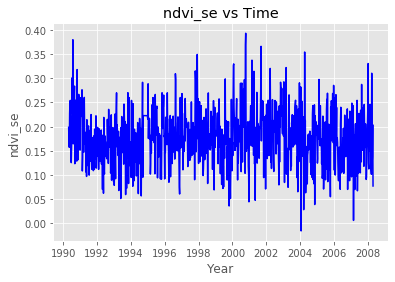


 ndvi_se is the Pixel southeast of city centroid




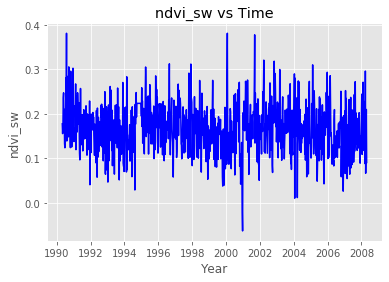


 ndvi_sw is the Pixel southwest of city centroid




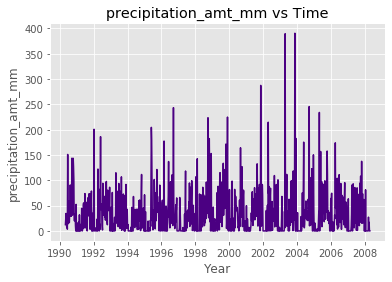


 precipitation_amt_mm is the Total precipitation




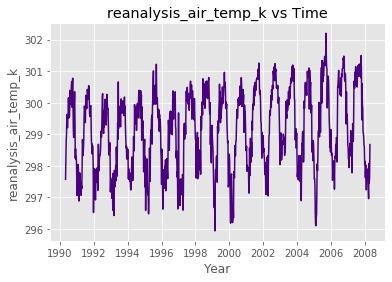


 reanalysis_air_temp_k is the Mean air temperature




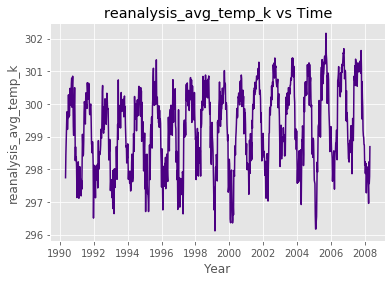


 reanalysis_avg_temp_k is the Average air temperature




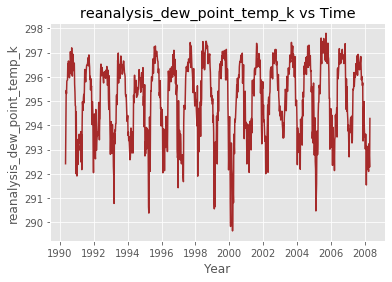


 reanalysis_dew_point_temp_k is the Mean dew point temperature




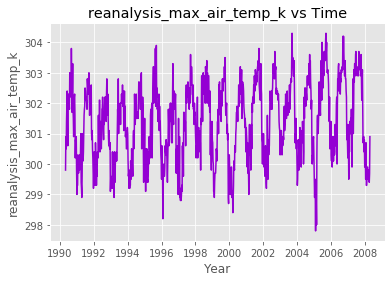


 reanalysis_max_air_temp_k is the Maximum air temperature




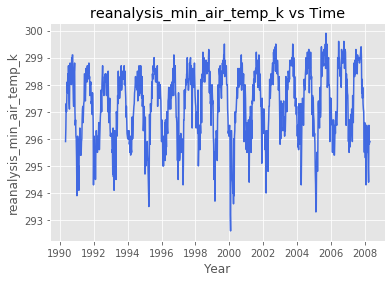


 reanalysis_min_air_temp_k is the Minimum air temperature




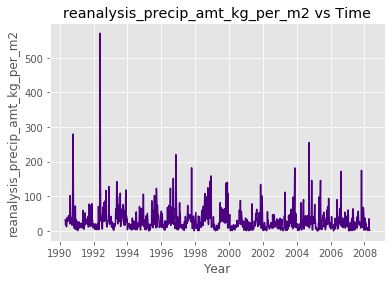


 reanalysis_precip_amt_kg_per_m2 is the Total precipitation




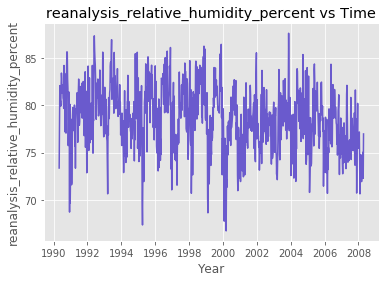


 reanalysis_relative_humidity_percent is the Mean relative humidity




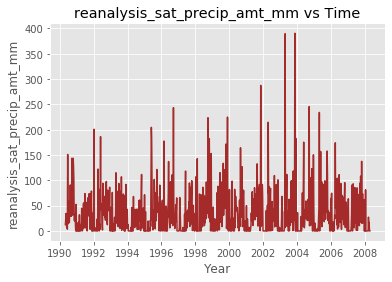


 reanalysis_sat_precip_amt_mm is the Total precipitation




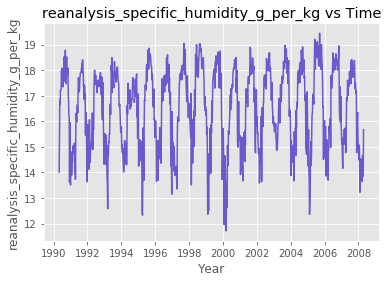


 reanalysis_specific_humidity_g_per_kg is the Mean specific humidity




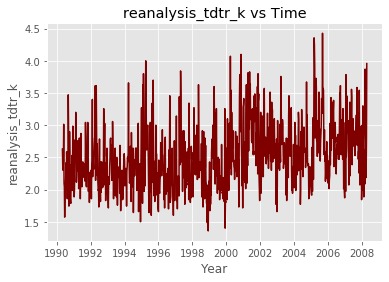


 reanalysis_tdtr_k is the Diurnal temperature range




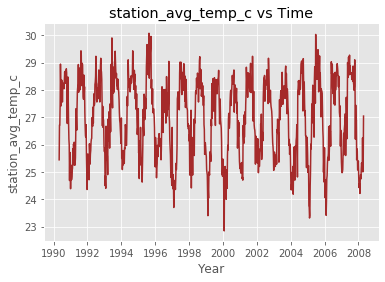


 station_avg_temp_c is the Average temperature




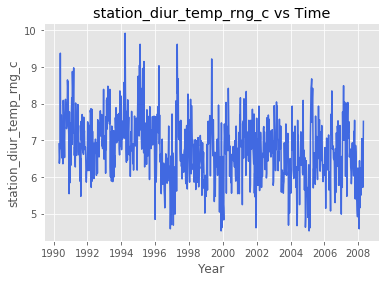


 station_diur_temp_rng_c is the Diurnal temperature range




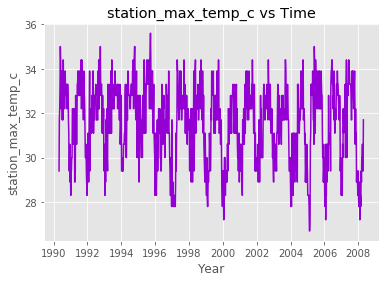


 station_max_temp_c is the Maximum temperature




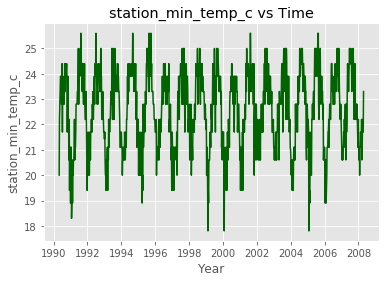


 station_min_temp_c is the Minimum temperature




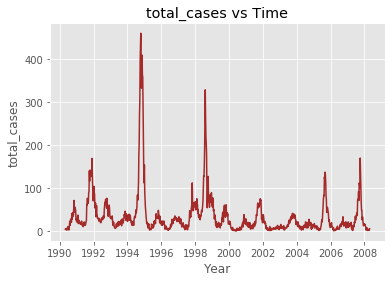


 total_cases is the total no of cases




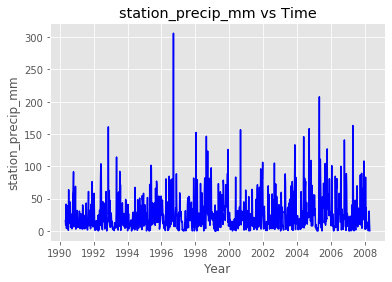


 station_precip_mm is the Total precipitation




In [0]:
#visualization for tthe city sj(san juan)
dataset_det={'station_max_temp_c' : 'Maximum temperature',
'station_min_temp_c' : 'Minimum temperature',
'station_avg_temp_c': 'Average temperature',
'station_precip_mm' :'Total precipitation',
'station_diur_temp_rng_c' : 'Diurnal temperature range',
'precipitation_amt_mm':'Total precipitation',
'reanalysis_sat_precip_amt_mm':'Total precipitation',
'reanalysis_dew_point_temp_k': 'Mean dew point temperature',
'reanalysis_air_temp_k' :'Mean air temperature',
'reanalysis_relative_humidity_percent' : 'Mean relative humidity',
'reanalysis_specific_humidity_g_per_kg' : 'Mean specific humidity',
'reanalysis_precip_amt_kg_per_m2' : 'Total precipitation',
'reanalysis_max_air_temp_k' : 'Maximum air temperature',
'reanalysis_min_air_temp_k' : 'Minimum air temperature',
'reanalysis_avg_temp_k' :'Average air temperature',
'reanalysis_tdtr_k' : 'Diurnal temperature range',
'ndvi_se' : 'Pixel southeast of city centroid',
'ndvi_sw' : 'Pixel southwest of city centroid',
'ndvi_ne' : 'Pixel northeast of city centroid',
'ndvi_nw' : 'Pixel northwest of city centroid',
'total_cases':'total no of cases'}
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']

d_columns=data_sj.columns
for col in d_columns:
  if col not in ['year','weekofyear','city']:
    dfo=data_sj[col]
    mat.style.use('ggplot')
    mat.plot(dfo.index,dfo,color=random.choice(set_of_colors))
    mat.xlabel('Year') 
    mat.ylabel(col)
    mat.title(col+' vs Time')
    mat.show()
    print("\n",col + " is the "+ dataset_det[col]+"\n\n")



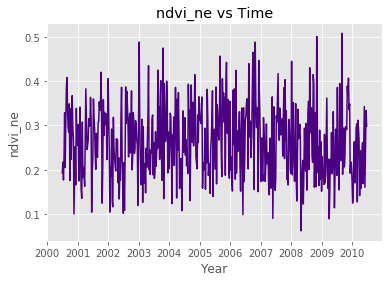


 ndvi_ne is the Pixel northeast of city centroid




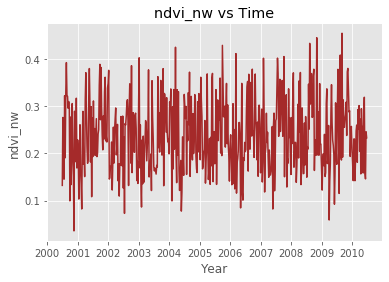


 ndvi_nw is the Pixel northwest of city centroid




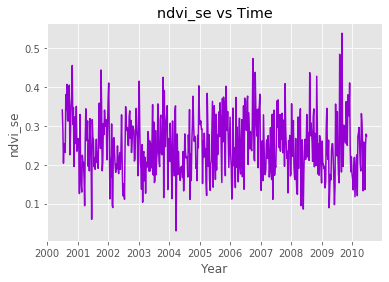


 ndvi_se is the Pixel southeast of city centroid




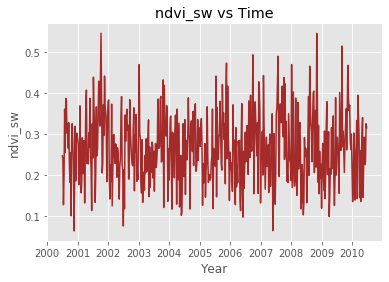


 ndvi_sw is the Pixel southwest of city centroid




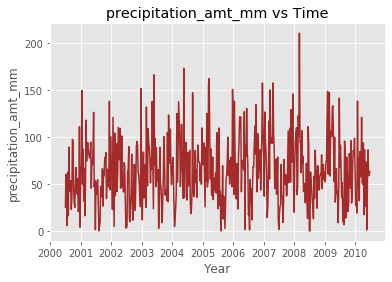


 precipitation_amt_mm is the Total precipitation




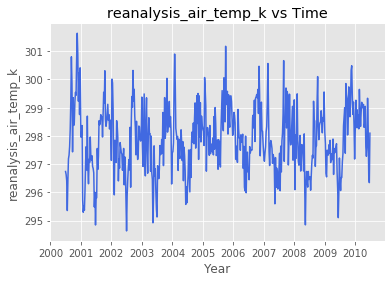


 reanalysis_air_temp_k is the Mean air temperature




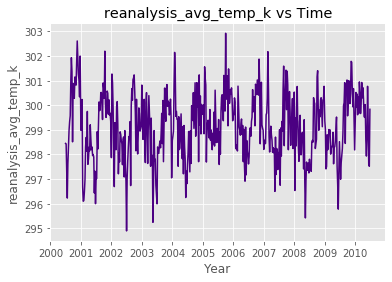


 reanalysis_avg_temp_k is the Average air temperature




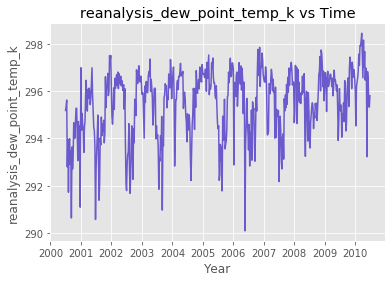


 reanalysis_dew_point_temp_k is the Mean dew point temperature




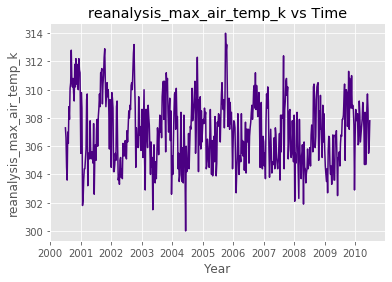


 reanalysis_max_air_temp_k is the Maximum air temperature




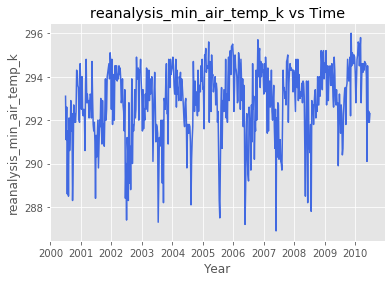


 reanalysis_min_air_temp_k is the Minimum air temperature




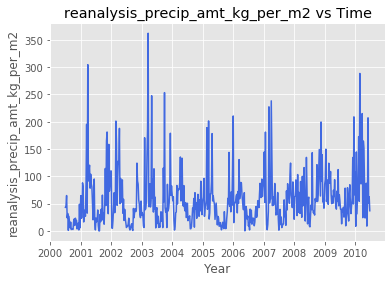


 reanalysis_precip_amt_kg_per_m2 is the Total precipitation




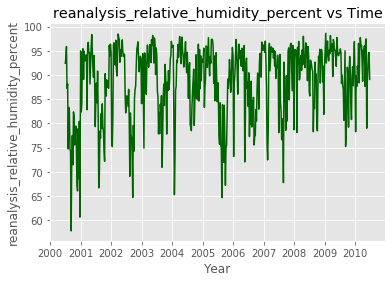


 reanalysis_relative_humidity_percent is the Mean relative humidity




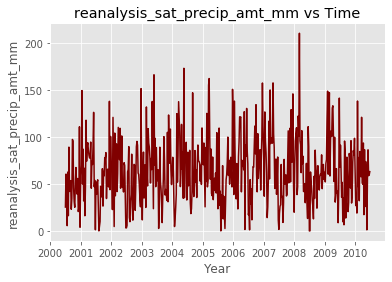


 reanalysis_sat_precip_amt_mm is the Total precipitation




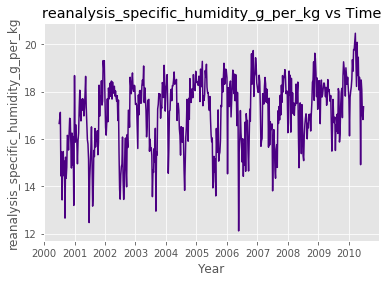


 reanalysis_specific_humidity_g_per_kg is the Mean specific humidity




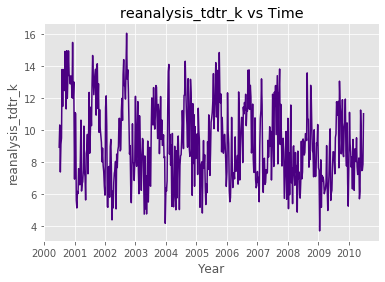


 reanalysis_tdtr_k is the Diurnal temperature range




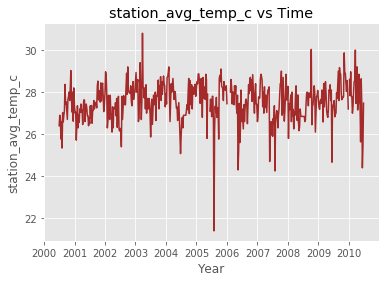


 station_avg_temp_c is the Average temperature




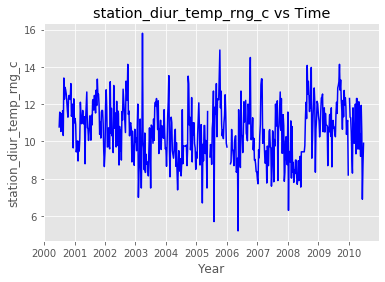


 station_diur_temp_rng_c is the Diurnal temperature range




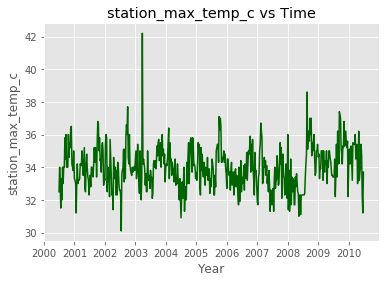


 station_max_temp_c is the Maximum temperature




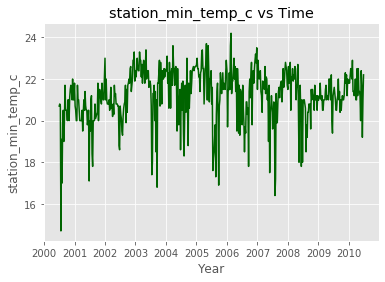


 station_min_temp_c is the Minimum temperature




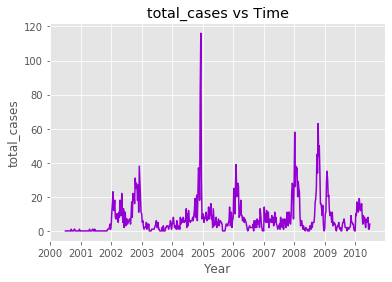


 total_cases is the total no of cases




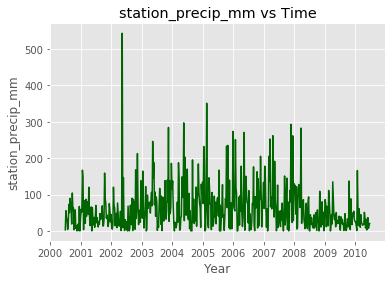


 station_precip_mm is the Total precipitation




In [0]:
#visualization for the city iq(Iquitos)
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']

d_columns=data_iq.columns
for col in d_columns:
  if col not in ['year','weekofyear','city']:
    dfo=data_iq[col]
    mat.style.use('ggplot')
    mat.plot(dfo.index,dfo,color=random.choice(set_of_colors))
    mat.xlabel('Year') 
    mat.ylabel(col)
    mat.title(col+' vs Time')
    mat.show()

    print("\n",col + " is the "+ dataset_det[col]+"\n\n")



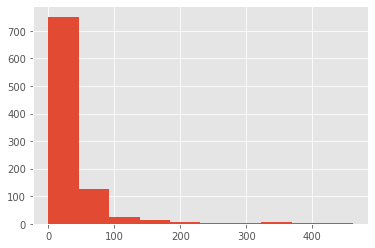

In [0]:
data_sj.total_cases.hist()

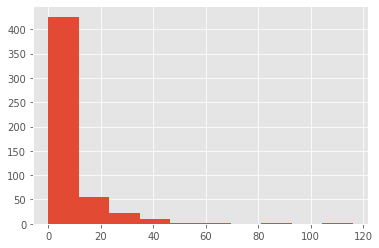

In [0]:
data_iq.total_cases.hist()

In [0]:
#it take 1 week for a dengue infected to show symptoms also it take approximately 2 weeks for a mosquito to become adult
#In total we have to shift 3 weeks so that our result can be more accurate
print(data_sj)
data_sj.total_cases=data_sj.total_cases.shift(-3,axis=0)
data_sj

                city  year  ...  total_cases  station_precip_mm
week_start_date             ...                                
1990-04-30        sj  1990  ...            4               16.0
1990-05-07        sj  1990  ...            5                8.6
1990-05-14        sj  1990  ...            4               41.4
1990-05-21        sj  1990  ...            3                4.0
1990-05-28        sj  1990  ...            6                5.8
...              ...   ...  ...          ...                ...
2008-03-25        sj  2008  ...            4                1.8
2008-04-01        sj  2008  ...            3                0.5
2008-04-08        sj  2008  ...            1               30.7
2008-04-15        sj  2008  ...            3               11.2
2008-04-22        sj  2008  ...            5                0.3

[936 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,3.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,6.0,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,2.0,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.0,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-25,sj,2008,13,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,3.0,1.8
2008-04-01,sj,2008,14,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,5.0,0.5
2008-04-08,sj,2008,15,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,NaN,30.7


In [0]:
#remove last 3 rows because we dont have the total cases for it
data_sj.drop(data_sj.index[[-1,-2,-3]],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1, 'San Juan Variable Correlations')

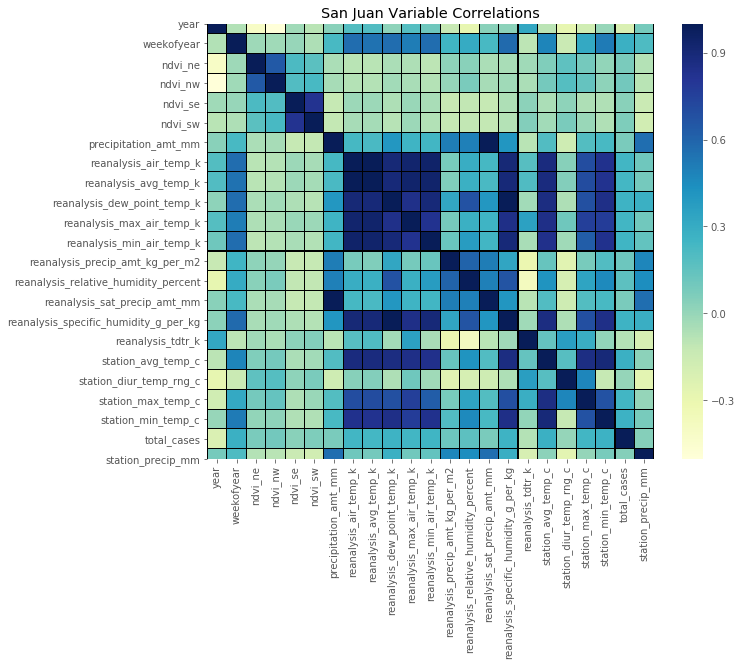

In [0]:
sj_correlation=data_sj.corr()
mat.figure(figsize=(10,8))

sj_corr_heat = sns.heatmap(sj_correlation,cmap="YlGnBu",linewidths=.1,linecolor='black')

mat.title('San Juan Variable Correlations')


In [0]:
#it take 1 week for a dengue infected to show symptoms also it take approximately 2 weeks for a mosquito to become adult
#In total we have to shift 3 weeks so that our result can be more accurate
print(data_iq)
data_iq.total_cases=data_iq.total_cases.shift(-3,axis=0)
data_iq

                city  year  ...  total_cases  station_precip_mm
week_start_date             ...                                
2000-07-01        iq  2000  ...            0                3.0
2000-07-08        iq  2000  ...            0               55.6
2000-07-15        iq  2000  ...            0               38.1
2000-07-22        iq  2000  ...            0               30.0
2000-07-29        iq  2000  ...            0                4.0
...              ...   ...  ...          ...                ...
2010-05-28        iq  2010  ...            5               27.0
2010-06-04        iq  2010  ...            8               36.6
2010-06-11        iq  2010  ...            1                7.4
2010-06-18        iq  2010  ...            1               16.0
2010-06-25        iq  2010  ...            4               20.4

[520 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-01,iq,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,0.0,3.0
2000-07-08,iq,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,0.0,55.6
2000-07-15,iq,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,0.0,38.1
2000-07-22,iq,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,0.0,30.0
2000-07-29,iq,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-28,iq,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,1.0,27.0
2010-06-04,iq,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,4.0,36.6
2010-06-11,iq,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,NaN,7.4


In [0]:
#remove last 3 rows because we dont have the total cases for it
data_iq.drop(data_iq.index[[-1,-2,-3]],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1, 'iquitos Variable Correlations')

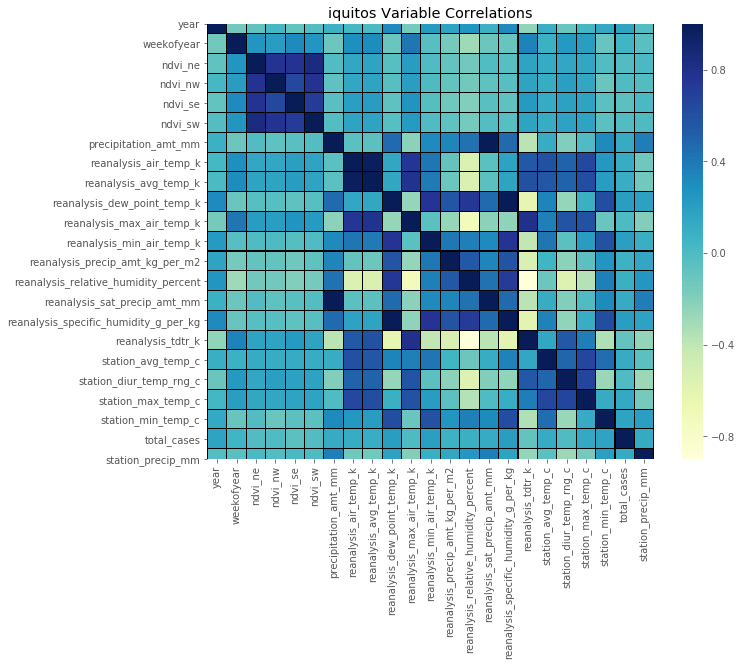

In [0]:
#finding correlation of train data sj
iq_correlation=data_iq.corr()
mat.figure(figsize=(10,8))

iq_corr_heat = sns.heatmap(iq_correlation,cmap="YlGnBu",linewidths=.1,linecolor='black')
mat.title('iquitos Variable Correlations')

In [0]:
data_sj[data_sj.isna()]

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,total_cases,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data_sj['ndvi_ne'].isnull().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,